Challenge Set 02-luther1   
Topic:        Exploring and visualizing scraped movie data in pandas  
Date:         04/16/2016  
Name:         Lucia Palova  
Worked with:  Cecilia Wong  

# Luther Challenges

# Pre-processing data

In [18]:
%matplotlib inline
import dateutil.parser
from string import ascii_uppercase
from pprint import pprint
import pandas as pd
import numpy as np
from patsy import dmatrices
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import scipy.stats

In [19]:
data = pd.read_csv("data/movies_mojo_uptoL.csv", dtype = {'widest_release_theaters' : str})
print len(data)
data = data.drop_duplicates()
print len(data)
#print data.columns
#print data.dtypes
data.rename(columns={'runtime_(mins)': 'runtime',
                     'widest_release_theaters' : 'theaters',
                     'domestic_total_gross' : 'total_gross',
                     'production_budget' : 'budget'
                    }, inplace=True)

9264
8962


In [20]:
# Transform 'release_date' to datetime
data['release_date'] = pd.to_datetime(data.release_date, format="%Y-%m-%d %H:%M:%S", errors = 'coerce')

In [21]:
# Removing lines with NaNs for 'theaters' and 'release_date' and 'budget' and 'runtime' and 'total_gross'
data = data[ pd.notnull(data['theaters']) ]
data = data[ pd.notnull(data['release_date']) ]
data = data[ pd.notnull(data['budget']) ]
data = data[ pd.notnull(data['runtime']) ]
data = data[ pd.notnull(data['total_gross']) ]

In [22]:
# Converting 'theaters' str to float
data['theaters'] = data['theaters'].map(lambda x: float(x.replace(',','')))

In [23]:
# Converting 'budget' str to float

def production_to_int(s):
    money_dict = { 'million' : 1000000 }
    s = s.replace(',','').replace('$','').strip().split()
    if len(s) == 1:
        return float(s[0])
    elif len(s) == 2:
        return float(s[0])*money_dict[s[1]]
    else:
        return None

data['budget'] = data['budget'].map(lambda x: production_to_int(x))


In [24]:
# Creating 'month' and 'year' columns
data['month'] = data['release_date'].map(lambda x: x.month)
data['year'] = data['release_date'].map(lambda x: x.year)

In [25]:
print len(data)
data.head()

1568


,movie_title,total_gross,release_date,runtime,rating,genre,distributor,director,producer,budget,theaters,actors,writers,cinematographers,composers,month,year
3,(500) Days of Summer,32391374.0,2009-07-17,95.0,PG-13,Romance,Fox Searchlight,Marc Webb,"Mason Novick,Mark S. Waters, ,(executive)",7500000.0,1048.0,"Zooey Deschanel,Joseph Gordon-Levitt,Geoffrey ...","Scott Neustadter,Michael H. Weber",NaN,"Mychael Danna,Rob Simonsen",7,2009
15,10 Things I Hate About You,38178166.0,1999-03-31,97.0,PG-13,Romantic Comedy,Buena Vista,NaN,"Jeffrey Chernov, ,(executive),Andrew Lazar",30000000.0,2311.0,"Julia Stiles,Heath Ledger,Joseph Gordon-Levitt","Karen McCullah Lutz,Kirsten Smith",NaN,NaN,3,1999
18,"10,000 B.C.",94784201.0,2008-03-07,109.0,PG-13,Period Adventure,Warner Bros.,Roland Emmerich,"Mark Gordon,Harald Kloser, ,(executive),Scott ...",105000000.0,3454.0,"Steven Strait,Camilla Belle","Roland Emmerich,Harald Kloser",NaN,"Harald Kloser,Thomas Wander",3,2008
30,102 Dalmatians,66957026.0,2000-11-22,104.0,G,Family Comedy,Buena Vista,NaN,NaN,85000000.0,2704.0,"Glenn Close,Gerard Depardieu,Ioan Gruffudd",NaN,NaN,NaN,11,2000
31,10th & Wolf,54702.0,2006-08-18,110.0,R,Crime Drama,ThinkFilm,NaN,NaN,8000000.0,6.0,"James Marsden,Giovanni Ribisi,Brad Renfro,Pipe...",NaN,NaN,Aaron Zigman,8,2006


# Challenges

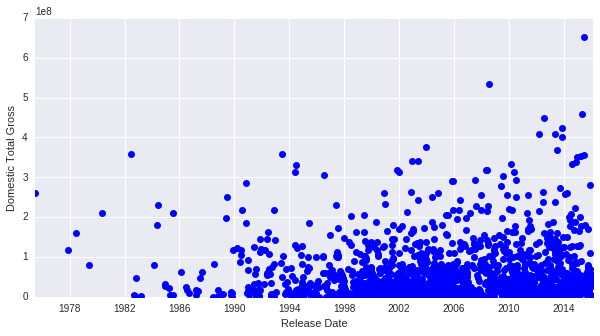

In [26]:
# Challenge 1
plt.figure(figsize=(10,5))
plt.plot(data.release_date, data.total_gross,"bo")
plt.xlabel("Release Date")
plt.ylabel("Domestic Total Gross")
plt.title("")
plt.show()

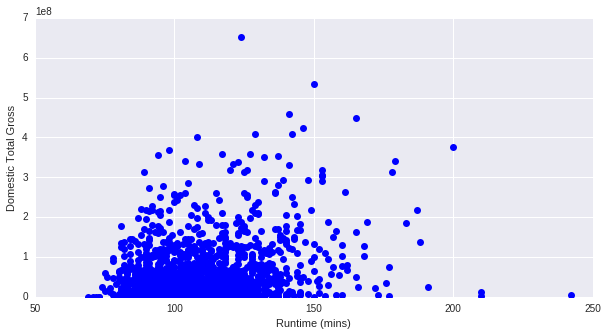

In [27]:
# Challenge 2
plt.figure(figsize=(10,5))
plt.plot(data.runtime, data.total_gross,"bo")
plt.xlabel("Runtime (mins)")
plt.ylabel("Domestic Total Gross")
plt.title("")
plt.show()


In [28]:
# Challenge 3
rating_data_mean = data[["total_gross","runtime","rating"]]
rating_data_mean = rating_data_mean.groupby("rating").mean().sort_values(by='total_gross', ascending=False)
print rating_data_mean

          total_gross     runtime
rating                           
G        9.772456e+07   89.878788
PG       8.210992e+07  101.836134
PG-13    7.047713e+07  110.937182
R        3.699816e+07  110.017673
NC-17    3.260233e+06  118.750000
Unrated  8.627782e+05  111.640000


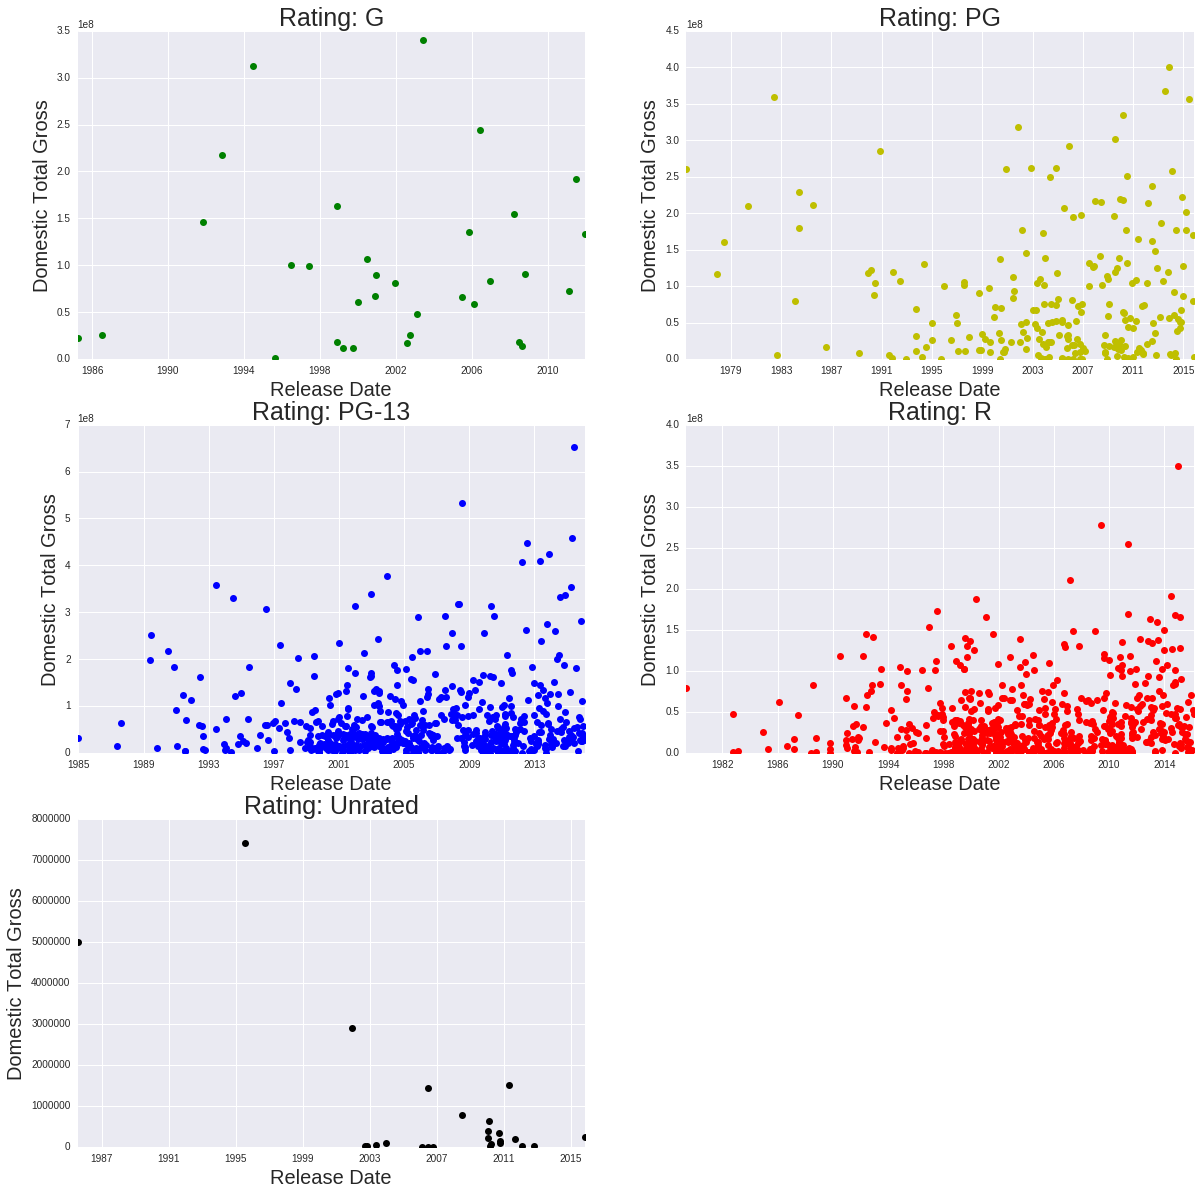

In [29]:
# Challenge 4 - using pandas
# TAs: I SPENT SO MUCH TIME ON TRYING TO FIGURE OUT HOW TO PLOT DATAFRAMES BY READING ONLINE SOURCES
# IT WOULD BE REALLY HELPFUL IF YOU GAVE US SOME GUIDANCE WITH RESPECT TO HOW TO PLOT DATAFRAMES USING MATPLOTLIB
# OR ANOTHER PLOTTING LIBRARY
rating_data = data[["rating", "release_date", "total_gross"]]
rating_list = rating_data.rating.unique()
#print rating_list

df1 = rating_data[rating_data["rating"] == "G" ]
df2 = rating_data[rating_data["rating"] == "PG" ]
df3 = rating_data[rating_data["rating"] == "PG-13" ]
df4 = rating_data[rating_data["rating"] == "R" ]
df5 = rating_data[rating_data["rating"] == "Unrated" ]

plt.close('all')       

plt.figure(figsize = (20,20))
plt.subplot(3,2,1)    
plt.plot(df1.release_date,df1.total_gross,'go',lw=4)    
plt.xlabel('Release Date',fontsize=20)    
plt.ylabel('Domestic Total Gross',fontsize=20)    
plt.title('Rating: G', fontsize = 25)

plt.subplot(3,2,2)    
plt.plot(df2.release_date,df2.total_gross,'yo',lw=4)    
plt.xlabel('Release Date',fontsize=20)    
plt.ylabel('Domestic Total Gross',fontsize=20)    
plt.title('Rating: PG', fontsize = 25)

plt.subplot(3,2,3)    
plt.plot(df3.release_date,df3.total_gross,'bo',lw=4)
plt.xlabel('Release Date',fontsize=20)  
plt.ylabel('Domestic Total Gross',fontsize=20) 
plt.title('Rating: PG-13', fontsize = 25)

plt.subplot(3,2,4)    
plt.plot(df4.release_date,df4.total_gross,'ro',lw=4)    
plt.xlabel('Release Date',fontsize=20)    
plt.ylabel('Domestic Total Gross',fontsize=20)  
plt.title('Rating: R', fontsize = 25)

plt.subplot(3,2,5)    
plt.plot(df5.release_date,df5.total_gross, 'ko',lw=4)    
plt.xlabel('Release Date',fontsize=20)    
plt.ylabel('Domestic Total Gross',fontsize=20)    
plt.title('Rating: Unrated', fontsize = 25)

plt.show()


In [30]:
# Challenge 5
# Removing rows with NaNs for 'directors', as well as list of error readings
data_director = data[ pd.notnull(data['director']) ]
data_director = data_director[["director","total_gross"]]
data_director_group = data_director.groupby('director').mean()
print data_director_group.sort_values(by='total_gross', ascending = False).head(10)
print len(data_director)
#print np.sort(data_director.director.unique())

                    total_gross
director                       
Colin Trevorrow    6.522706e+08
Joss Whedon        4.590059e+08
Gary Ross          4.080107e+08
Pete Docter        3.564617e+08
James Gunn         3.331766e+08
David Yates        2.969820e+08
Francis Lawrence   2.751794e+08
Christopher Nolan  2.478326e+08
Jon Favreau        2.261211e+08
Jerry Zucker       2.176313e+08
1077


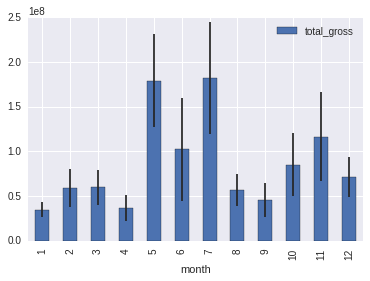

In [31]:
# Challenge 6
data_2013 = data[ data['year'] == 2013 ]
data_2013 = data_2013[["month","total_gross"]]
data_2013_means = data_2013.groupby(['month']).mean()
data_2013_stds = data_2013.groupby(['month']).std()
data_2013_sem = data_2013.groupby(['month']).aggregate(scipy.stats.sem)

data_2013_means.plot.bar(yerr=data_2013_sem.total_gross)